# Задача классификации стрнаы для рецепта
Соревнование Kaggle: https://www.kaggle.com/c/whats-cooking/data

Особенность -- наличие признаков, представленных в текстовом виде

In [17]:
import json

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import *
from sklearn.cross_validation import *

import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка и предобработка данных

In [2]:
f = open("data/Cooking/train.json", "r")
inp_data = json.load(f)
f.close()

### Пример данных

Описание полей:
- cuisine -- национальная кухня
- id -- ID рецепта
- ingredients -- список ингридентов, каждый ингридент представлен в текстовом виде.

In [3]:
inp_data[0]

{u'cuisine': u'greek',
 u'id': 10259,
 u'ingredients': [u'romaine lettuce',
  u'black olives',
  u'grape tomatoes',
  u'garlic',
  u'pepper',
  u'purple onion',
  u'seasoning',
  u'garbanzo beans',
  u'feta cheese crumbles']}

### Преобразум данные в табличный вид

In [4]:
# Преобразум список ингридентов в одно текстовое поле
l_ingridients_in_text = []
for recipe in inp_data:
    l_ingridients_in_text.append(", ".join(recipe["ingredients"]))
    # Конструкция ", ".join(Список) -- объединяет все элементы списка через ,
    # ", ".join(["a", "b", "c"]) --> "a, b, c"

df_inp = pd.DataFrame(inp_data)
df_inp["ingredients_text"] = l_ingridients_in_text
df_inp.iloc[:5, :]

,cuisine,id,ingredients,ingredients_text
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep..."


Удаляем лишние столбцы id и ingredients (в виде списка)

In [5]:
del df_inp["id"]

In [6]:
df_inp.iloc[:5, :]

,cuisine,ingredients,ingredients_text
0,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,"[water, vegetable oil, wheat, salt]","water, vegetable oil, wheat, salt"
4,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper, shallots, cornflour, cayenne pep..."


## Анализ и предобработка данных

Количество уникальных классов -- национальных кухонь.

In [7]:
print("Список классов:")
print(", ".join(df_inp["cuisine"].unique()) )
print("")
print(u"Всего классов: {0}".format(len(df_inp["cuisine"].unique())))

Список классов:
greek, southern_us, filipino, indian, jamaican, spanish, italian, mexican, chinese, british, thai, vietnamese, cajun_creole, brazilian, french, japanese, irish, korean, moroccan, russian

Всего классов: 20


Вывдем диаграмму распределения классов

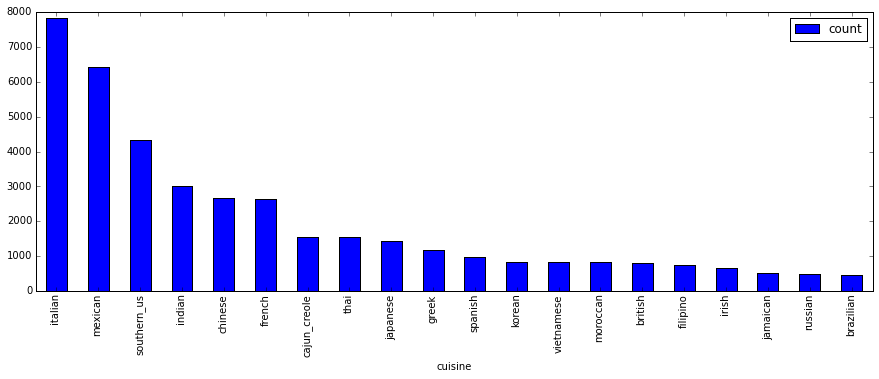

In [10]:
fig = df_inp[["ingredients_text", "cuisine"]].groupby("cuisine").agg("count").rename(columns={"ingredients_text":"count"}).sort("count", ascending=False).plot(kind="bar", figsize=(15, 5))

## Формирование вектора для ингридиентов

### Каждый ингридиент -- отдельный параметр
1 -- если такой ингридиент есть в рецепте, 0 -- если нет.

In [13]:
label_vect = MultiLabelBinarizer()
label_vect.fit(df_inp["ingredients"])

X = label_vect.transform(df_inp["ingredients"])
Y = df_inp["cuisine"]

In [16]:
X.shape

(39774, 6714)

In [18]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=3209582347)